Readme

In [3]:
### header
import numpy as np
import matplotlib.pyplot as plt

First import the data. The npy file is the complex valued classical fuzzy dark matter field, $\psi(x)$. The data is a four dimensional complex array, the first dimension specifies the field (for the case where we want multiple ultra light fields). Information about the box size, resolution, etc, can be found in the meta.toml file.

In [4]:
data = np.load("psi.npy")
psi = data[0]

L = 23.094010767585033 # box size in kpc
N = 256 # grid resolution 

The square amplitude of the field is the density in units of kpc and solar masses.

$\rho(x) = |\psi(x)|^2$

In [5]:
rho = np.abs(psi)**2

We plot the log density projection and slice below.

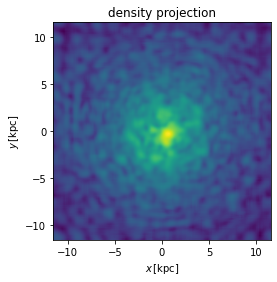

In [6]:
log_rho_proj = np.log(np.sum(rho,axis= 0))
plt.imshow(log_rho_proj, extent = (-L/2, L/2, -L/2, L/2) )
plt.xlabel(r'$x\,[\mathrm{kpc}]$')
plt.ylabel(r'$y\,[\mathrm{kpc}]$')
plt.title('density projection')
plt.show()

We plot a density slice below.

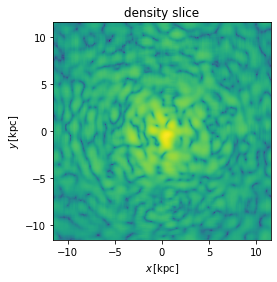

In [7]:
log_rho_slice = np.log(rho[N//2,:,:])
plt.imshow(log_rho_slice, extent = (-L/2, L/2, -L/2, L/2) )
plt.xlabel(r'$x\,[\mathrm{kpc}]$')
plt.ylabel(r'$y\,[\mathrm{kpc}]$')
plt.title('density slice')
plt.show()

Calulate the $\kappa$ using Equations from Bartelmann 1999. $\nabla \Phi=4\pi G\bar{\rho}\delta$. $\kappa=4\pi G\bar{\rho}\int_0^wdw'\frac{f(w')f(w-w')}{f(w)}\frac{\delta(\theta,f(w'))}{a(w')}$. 



1.057785076607283e-10 -1.6464113169415346e-11


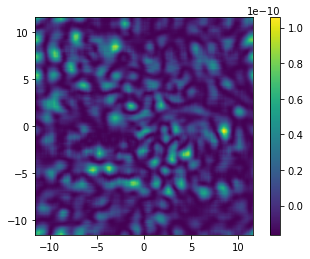

In [15]:
G     = 4.3009172706e-6       # Gravitational constant in units of (kpc/Msun)*(km/s)^2
vc    = 299792.458 # speed of light in km/s
Ds    = 10.0       # The source distance assuming delta function in units of pc.
Dl    = 5.0        # The lens distance assuming delta function in units of pc.
Dls   = Ds-Dl      # The distance between the source and the lens.
nslice= 12
rhom  = np.mean(rho[N//nslice,:,:])
delta = (rho[N//nslice,:,:]-rhom)/rhom
kappa = (4.0*np.pi*G*rhom/vc/vc)*(Dl*Dls/Ds)*(delta)
print(np.max(kappa),np.min(kappa))
plt.imshow(kappa, extent = (-L/2, L/2, -L/2, L/2))
plt.colorbar()
plt.show()

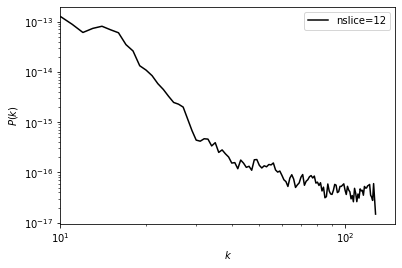

In [16]:
import scipy.stats as stats
from scipy.ndimage import gaussian_filter1d

def power_spectrum(image,plot=True,transform=True):
    
    npix = image.shape[0]

    fourier_image = np.fft.fftn(image)
    fourier_amplitudes = np.abs(fourier_image)**2

    kfreq = np.fft.fftfreq(npix) * npix
    kfreq2D = np.meshgrid(kfreq, kfreq)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

    knrm = knrm.flatten()
    fourier_amplitudes = fourier_amplitudes.flatten()

    kbins = np.arange(0.5, npix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])
    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                         statistic = "mean",
                                         bins = kbins)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
    ksmooth= gaussian_filter1d(kvals, 3.5)
    if plot:
        plt.loglog(ksmooth, Abins)
        plt.xlabel("$k$")
        plt.ylabel("$P(k)$")
        plt.xlim(10,150)
        plt.show()
    return kvals,Abins


kval,  kbins  = power_spectrum(kappa,plot=False,transform=True)
plt.loglog(kval,  kbins,'k-',label='nslice='+str(nslice))
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.xlim(10,150)
plt.legend()
plt.show()